# Pilot

In [1]:
import pandas as pd
import os

#### Merging 12 months data into a single file


In [3]:
folder_path = 'D:\g\Sales Files'
merged_data = pd.DataFrame()
file_list = os.listdir(folder_path)
for file in file_list:
    if file.endswith('.csv'):
        file_path = os.path.join(folder_path, file)
        months_data = pd.read_csv(file_path)
        merged_data = pd.concat([merged_data, months_data], ignore_index = True)
merged_data.to_csv('D:/g/all_files.merged_data.csv', index = False)

### Read in updated Dataframe


In [2]:
df = pd.read_csv(r"D:\g\all_files.merged_data.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Clean Up The Data

In [3]:
nan_df = df[df.isna().any(axis = 1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Dropping rows with NaN value
df.dropna(inplace = True)

In [5]:
##Dropping "OR" values
df = df[df['Order Date'].str[0:2] != 'Or']
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Convert Columns to the Correct type

In [6]:
df["Quantity Ordered"] = pd.to_numeric(df["Quantity Ordered"])
df['Price Each'] = pd.to_numeric(df["Price Each"])

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


###  Augment data with additional columns

#### Add Month Column

In [7]:
df['Month'] = df['Order Date'].str[0:2]

In [8]:
df['Month'] = df['Month'].astype('int32')

#### Add Sales Column

In [9]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

#### Add City Column

In [10]:
#.apply method
df['City'] = df['Purchase Address'].apply(lambda x: x.split(',')[1] + " " + x.split(',')[2].split()[0])

In [11]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


### Business Use Case - 1
## What was the best month for sales ? How much was earned that month ?


In [12]:
result = df.groupby('Month').sum()

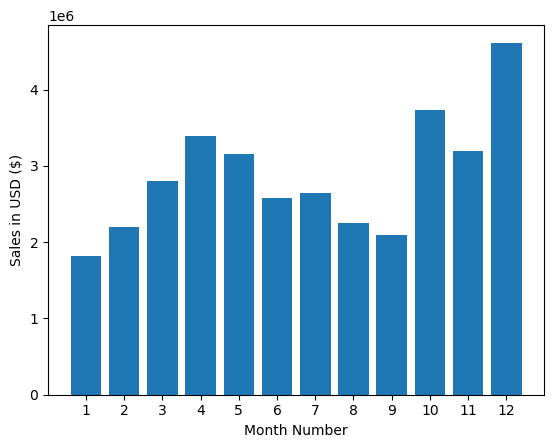

In [13]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months, result["Sales"])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### What US city has the highest number of sales ?

In [119]:
res = df.groupby('City').sum()

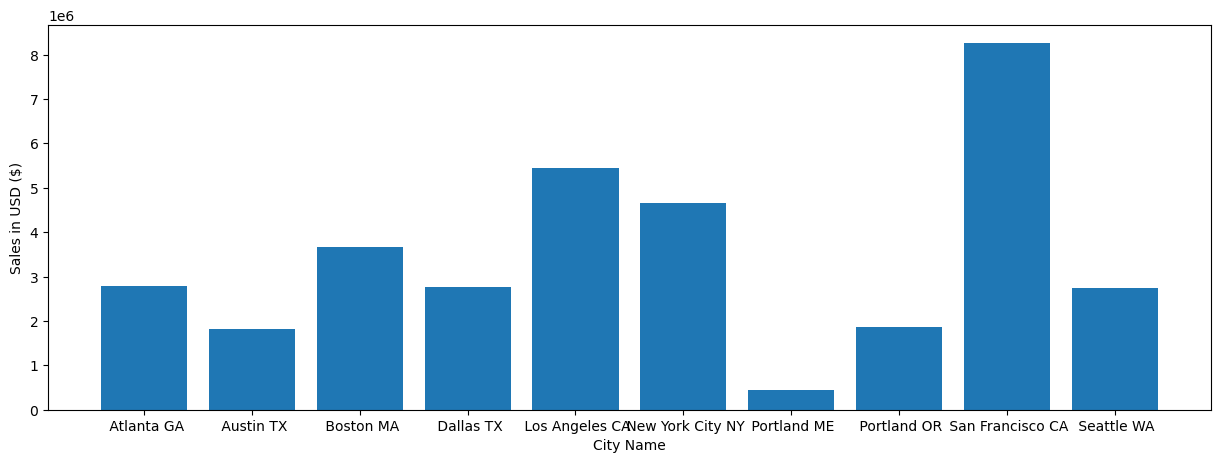

In [120]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
cities = [city for city, d in df.groupby('City')]
plt.bar(cities, res["Sales"])
plt.xticks(cities)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying products ?


In [22]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

C:\Users\DELL\AppData\Local\Temp\ipykernel_18436\3072535395.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


In [24]:
df['Hour']= df['Order Date'].dt.hour
df['Minute']= df['Order Date'].dt.minute


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,59


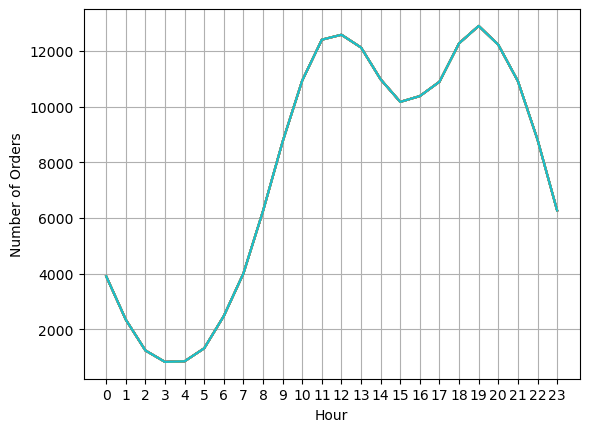

In [32]:
hours = [hour for hour, df in df.groupby('Hour')]
plt.plot(hours, df.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()
